![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 1311 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        964 non-null    datetime64[ns]
 1   home_team   964 non-null    object        
 2   away_team   964 non-null    object        
 3   home_score  964 non-null    int64         
 4   away_score  964 non-null    int64         
 5   tournament  964 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 52.7+ KB


C:\Users\Anne\AppData\Local\Temp\ipykernel_21128\2757234924.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_world_cup["date"] = pd.to_datetime(men_world_cup["date"])
C:\Users\Anne\AppData\Local\Temp\ipykernel_21128\2757234924.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_world_cup["date"] = pd.to_datetime(women_world_cup["date"])


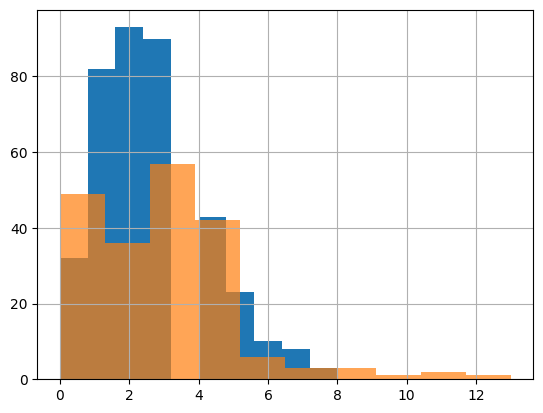

'reject'

In [52]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

# Exploratory data analysis
# Determining the column names, data types, and values
men_results = pd.read_csv("men_results.csv", index_col=0)
women_results = pd.read_csv("women_results.csv", index_col=0)
# men_results.info()
# men_results.head()
# women_results.info()
# women_results.head()

# Filtering the data
# Filtering for FIFA World Cup matches
men_world_cup = men_results[men_results["tournament"] == "FIFA World Cup"]
women_world_cup = women_results[women_results["tournament"] == "FIFA World Cup"]

# Filtering for matches after 2002-01-01
men_world_cup["date"] = pd.to_datetime(men_world_cup["date"])
women_world_cup["date"] = pd.to_datetime(women_world_cup["date"])
men_world_cup.info()
# women_world_cup.info()
men_world_cup = men_world_cup[men_world_cup["date"] >= "2002-01-01"]
women_world_cup = women_world_cup[women_world_cup["date"] >= "2002-01-01"]

# Choosing the correct hypothesis test
# Determining the type of hypothesis test
men_world_cup.shape
women_world_cup.shape
men_world_cup["total_scores"] = men_world_cup["home_score"] + men_world_cup["away_score"]
women_world_cup["total_scores"] = women_world_cup["home_score"] + women_world_cup["away_score"]

# Determining if the data is normally distributed
men_world_cup["total_scores"].hist()
women_world_cup["total_scores"].hist(alpha=0.7)
plt.show()

# Performing the hypothesis test
men_world_cup["gender"] = "men"
women_world_cup["gender"] = "women"
world_cup = pd.concat([men_world_cup, women_world_cup], axis=0, ignore_index=True)
world_cup_subset = world_cup[["total_scores", "gender"]]
world_cup_subset_pivot = world_cup_subset.pivot(columns="gender", values="total_scores")

# How to perform the hypothesis test using pingouin
result_pingouin = pingouin.mwu(x=world_cup_subset_pivot['women'], y=world_cup_subset_pivot['men'], alternative="greater")

# How to perform the hypothesis test using SciPy
result_mannwhitneyu = mannwhitneyu(x=women_world_cup['total_scores'], y=men_world_cup['total_scores'], alternative="greater")

# Extracting the p-value using pingouin
p_value_pingouin = result_pingouin["p-val"].values[0]

# # Extracting the p-value using SciPy
p_value_mannwhitneyu = result_mannwhitneyu.pvalue

# Interpreting the result of the hypothesis test
# Determining the result from the p-value and significance level
if p_value_pingouin <= 0.01:
    result_pingouin = "reject"
else:
    result_pingouin = "fail to reject"

result_dict_pingouin = {"p_val": p_value_pingouin, "result": result_pingouin}
result_dict_pingouin

if p_value_mannwhitneyu <= 0.01:
    result_mannwhitneyu = "reject"
else:
    result_mannwhitneyu = "fail to reject"

result_dict = {"p_val": p_value_mannwhitneyu, "result": result_mannwhitneyu}
result_mannwhitneyu